<a href="https://colab.research.google.com/github/dima1115/Machine-learning/blob/main/%D0%94%D0%B0%D1%80%D0%BC%D0%BE%D1%81%D1%82%D1%83%D0%BA_%D0%BF%D1%808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 8. Кластеризація
Датасет possum.csv
Дармостук Дмитро, ФІТ-4-9

## 1. Імпорт бібліотек

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 140)

## 2. Завантаження даних possum.csv

In [18]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('possum.csv')
df.head()

Saving possum.csv to possum (1).csv


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## 3. Первинний аналіз даних (EDA)

In [19]:
print('Розмірність датафрейму:', df.shape)

print('\nТипи даних у стовпцях:')
print(df.dtypes)

print('\nПерші спостереження:')
display(df.head())

print('\nОписова статистика для числових змінних:')
display(df.describe())

Розмірність датафрейму: (104, 14)

Типи даних у стовпцях:
case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

Перші спостереження:


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0



Описова статистика для числових змінних:


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [20]:
print('Розподіл змінної sex:')
print(df['sex'].value_counts())

print('\nРозподіл змінної Pop:')
print(df['Pop'].value_counts())

print('\nКількість пропусків у кожному стовпці:')
print(df.isna().sum())

Розподіл змінної sex:
sex
m    61
f    43
Name: count, dtype: int64

Розподіл змінної Pop:
Pop
other    58
Vic      46
Name: count, dtype: int64

Кількість пропусків у кожному стовпці:
case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


## 4. Кодування категоріальних змінних і очищення даних

In [21]:
df_clean = df.copy()

# кодуємо стать: m -> 1, f -> 0
df_clean['sex_num'] = df_clean['sex'].map({'m': 1, 'f': 0})

# кодуємо популяцію: Vic -> 1, other -> 0
df_clean['Pop_num'] = df_clean['Pop'].map({'Vic': 1, 'other': 0})

# видаляємо рядки з пропусками
df_clean = df_clean.dropna().reset_index(drop=True)

print('Розмірність після видалення пропусків:', df_clean.shape)
print('\nКількість пропусків тепер:')
print(df_clean.isna().sum())

Розмірність після видалення пропусків: (101, 16)

Кількість пропусків тепер:
case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
sex_num     0
Pop_num     0
dtype: int64


## 5. Вибір ознак для кластеризації та кореляційна матриця

Форма матриці ознак: (101, 10)


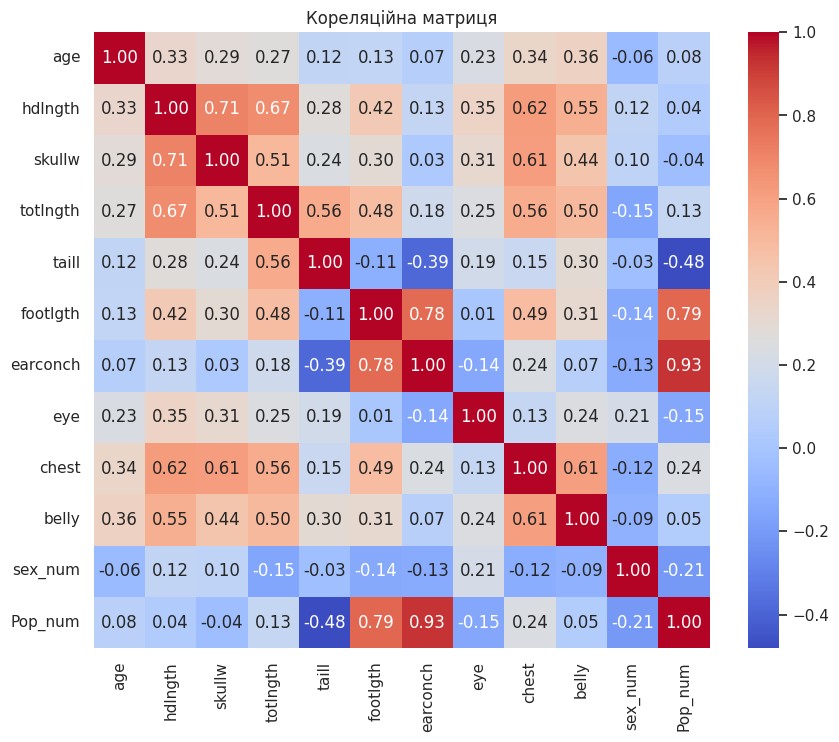

In [22]:
# використовуємо тільки числові антропометричні ознаки
feature_cols = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

X = df_clean[feature_cols].values
print('Форма матриці ознак:', X.shape)

# додаємо до кореляційної матриці також закодовані sex_num та Pop_num
corr_cols = feature_cols + ['sex_num', 'Pop_num']
corr = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Кореляційна матриця')
plt.show()

## 6. Масштабування ознак

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Середнє по кожній ознаці (після масштабування):')
print(X_scaled.mean(axis=0).round(4))
print('\nСтандартне відхилення:')
print(X_scaled.std(axis=0).round(4))

Середнє по кожній ознаці (після масштабування):
[ 0. -0.  0. -0.  0.  0.  0.  0.  0. -0.]

Стандартне відхилення:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 7. Вибір кількості кластерів методом "лікоть" (Elbow method)

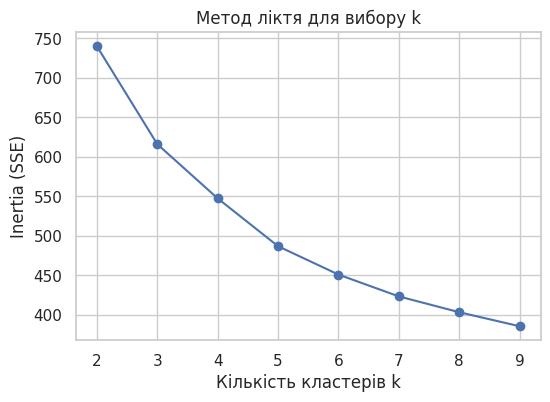

In [24]:
from sklearn.cluster import KMeans

ks = range(2, 10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('Кількість кластерів k')
plt.ylabel('Inertia (SSE)')
plt.title('Метод ліктя для вибору k')
plt.grid(True)
plt.show()

## 8. Оцінка силуетного коефіцієнта для різних k

k = 2 silhouette = 0.219
k = 3 silhouette = 0.21
k = 4 silhouette = 0.202
k = 5 silhouette = 0.197
k = 6 silhouette = 0.173
k = 7 silhouette = 0.17
k = 8 silhouette = 0.177
k = 9 silhouette = 0.158


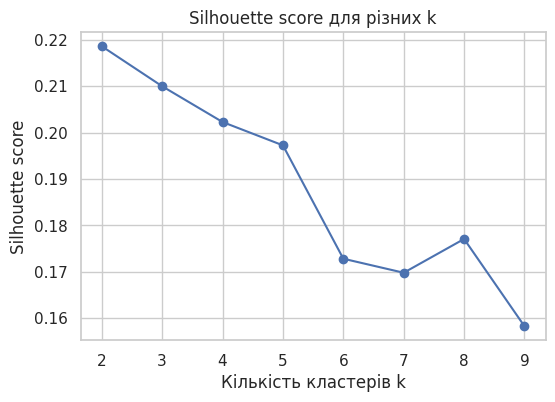

In [25]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print('k =', k, 'silhouette =', round(sil, 3))

plt.figure(figsize=(6, 4))
plt.plot(list(ks), sil_scores, marker='o')
plt.xlabel('Кількість кластерів k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score для різних k')
plt.grid(True)
plt.show()

## 9. Обрання найкращого k і кластеризація KMeans

In [26]:
best_index = int(np.argmax(sil_scores))
best_k = list(ks)[best_index]
print('Обране значення k за silhouette score:', best_k)

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df_clean['cluster_kmeans'] = cluster_labels

print("\nКількість об'єктів у кластерах:")
print(df_clean['cluster_kmeans'].value_counts().sort_index())

Обране значення k за silhouette score: 2

Кількість об'єктів у кластерах:
cluster_kmeans
0    58
1    43
Name: count, dtype: int64


## 10. Візуалізація кластерів KMeans на площині двох ознак

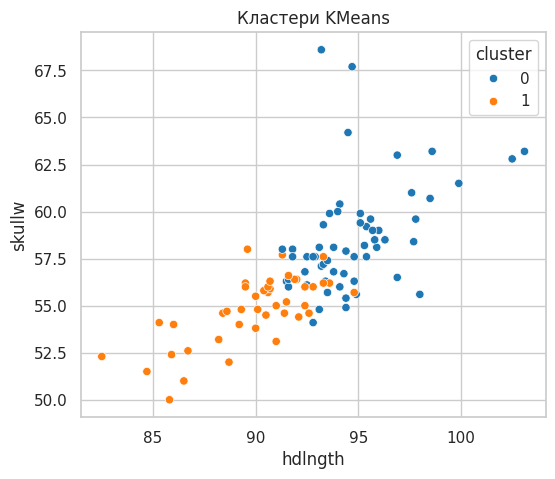

In [27]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df_clean['hdlngth'],
    y=df_clean['skullw'],
    hue=df_clean['cluster_kmeans'],
    palette='tab10'
)
plt.xlabel('hdlngth')
plt.ylabel('skullw')
plt.title('Кластери KMeans')
plt.legend(title='cluster')
plt.show()

## 13. Висновки

1. Дані possum.csv були очищені від пропусків та підготовлені до кластеризації.
2. Для числових ознак було виконано масштабування за допомогою StandardScaler.
3. За допомогою методу ліктя та силуетного коефіцієнта було підібрано кількість кластерів для алгоритму KMeans.
4. Отримані кластери KMeans було візуалізовано на площині двох ознак, а також досліджено структуру кластерів.
5. Ієрархічна кластеризація дозволила побудувати дендрограму і побачити вкладену структуру груп.
6. Метод DBSCAN показав наявність густих груп та можливих шумових спостережень.
7. Результати кластеризації можна інтерпретувати як поділ опосумів на групи за антропометричними характеристиками.